<a href="https://colab.research.google.com/github/pyagoubi/Motorcycle-data/blob/main/Motorcycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


In [177]:
data = pd.read_csv('/content/drive/MyDrive/upwork1/DATA1.TXT', sep=',')
data['Gx clean'] = data['Gx']-data['Gx Cal']
data['Gy clean'] = data['Gy']-data['Gy Cal']

In [185]:
#Parameters

#Step 1
shift_p = 10
Gy_min = 11

#Step 2
shift_a = 20
degree_min = 20

#Step 1

Determining local Maxima/ Minima based on Longitude/ Latitude Data

In [183]:
#calculate the distance on Longitude/ Latitude plane assuming 2D plane

def local_maxmin(df, shift = shift_p):
  
  for i in df['SessionID'].unique():

    data = df[df['SessionID'] == i]

    data['Lat diff'] = data['Latitude'] - data['Latitude'].shift(shift)
    data['Lon diff'] = data['Longitude'] - data['Longitude'].shift(shift)

    data['Lat mdiff'] = data['Latitude'].shift(-shift) - data['Latitude']
    data['Lon mdiff'] = data['Longitude'].shift(-shift) - data['Longitude']

    data.loc[((data['Lat mdiff'] > 0) & (data['Lat diff'] < 0))| ((data['Lat mdiff'] < 0) & (data['Lat diff'] > 0)) 
    | ((data['Lon mdiff'] > 0) & (data['Lon diff'] < 0))
    | ((data['Lon mdiff'] < 0) & (data['Lon diff'] >= 0)), 'corner'] = 1 

    df.loc[df['SessionID'] == i, 'corner'] = data['corner'] 
  
  plt.scatter(x=data['Longitude'], y=data['Latitude'])
  plt.scatter(x=data.loc[data['corner'] == 1, 'Longitude'], y=data.loc[data['corner'] == 1,'Latitude'], color = 'y')

  return df




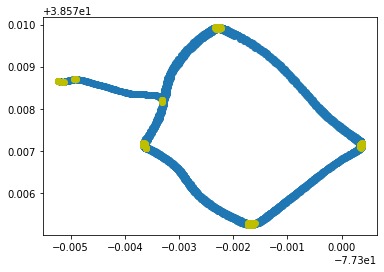

In [184]:
data = local_maxmin(data, shift = shift_p)

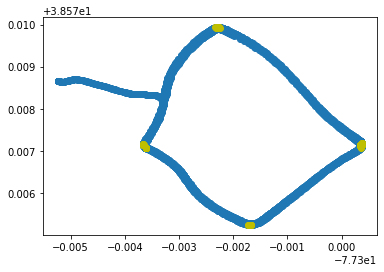

In [186]:
#Points on the left can be eliminated by setting Gy-value (absolute) to >11, but then we lose data from the first lap

plt.scatter(x=data['Longitude'], y=data['Latitude'])
plt.scatter(x=data.loc[(data['corner'] == 1) & (data['Gy clean'].abs() >Gy_min), 'Longitude'], y=data.loc[(data['corner'] == 1) 
& (data['Gy clean'].abs() >Gy_min),'Latitude'], color = 'y')

#Step 2

Determining corners by calculating angles between points


In [108]:
shift_parameter = 20

def angle_corner(df, shift_parameter = shift_a, degree_pm = degree_min):

  for i in df['SessionID'].unique():

    data = df[df['SessionID'] == i]

    # Convert the points to numpy latitude/longitude radians space

    data['Lat converted'] = np.radians(data['Latitude'])
    data['Lon converted'] = np.radians(data['Longitude'])

    #past reference point
    data['Lat before'] = data['Lat converted'].shift(shift_parameter)
    data['Lon before'] = data['Lon converted'].shift(shift_parameter)

    #future reference point
    data['Lat after'] = data['Lat converted'].shift(-shift_parameter)
    data['Lon after'] = data['Lon converted'].shift(-shift_parameter)


    # Vectors in latitude/longitude space
    data['vector prev'] = (np.array(data[['Lat converted', 'Lon converted']]) - np.array(data[['Lat before', 'Lon before']])).tolist()
    data['vector past'] = (np.array(data[['Lat converted', 'Lon converted']]) - np.array(data[['Lat after', 'Lon after']])).tolist()




    

In [127]:
np.degrees(math.acos(np.dot(data['vector prev'][30], data['vector past'][30]) / (np.linalg.norm(data['vector prev'][30]) * np.linalg.norm(data['vector past'][30]))))

179.72609439156923

In [147]:
np.degrees(math.acos(np.dot(data['vector prev'][30], data['vector past'][30]) / (np.linalg.norm(data['vector prev'][30]) * np.linalg.norm(data['vector past'][30]))))

179.72609439156923

In [154]:
data['degrees'] = 0

for i in range(len(data)):
  if np.isnan(data['vector prev'][i][0]) == False:
    data.iloc[i, data.columns.get_loc('degrees')] = np.degrees(math.acos(np.dot(data['vector prev'][i], data['vector past'][i]) / (np.linalg.norm(data['vector prev'][i]) * np.linalg.norm(data['vector past'][i]) +1e-20)))

In [ ]:
for i in range(len(data)):
  print(data.iloc[i, data.columns.get_loc('degrees')])

In [164]:
degree_pm= 40

data['c2'] = 0
data.loc[(data['degrees'] < (180 - degree_pm) )  |  (data['degrees'] > (180 + degree_pm) )    , 'c2'] = 1

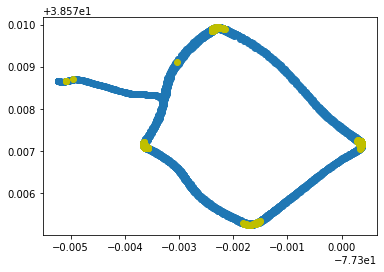

In [158]:
plt.scatter(x=data['Longitude'], y=data['Latitude'])
plt.scatter(x=data.loc[(data['c2'] == 1) & (data['Gy clean'].abs() >11), 'Longitude'], y=data.loc[(data['c2'] == 1) 
& (data['Gy clean'].abs() >11),'Latitude'], color = 'y')

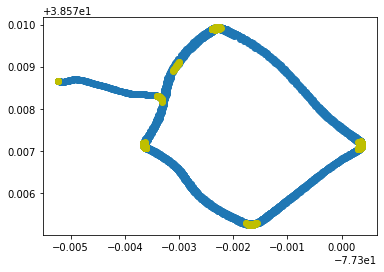

In [165]:
plt.scatter(x=data['Longitude'], y=data['Latitude'])
plt.scatter(x=data.loc[(data['c2'] == 1) , 'Longitude'], y=data.loc[(data['c2'] == 1) ,'Latitude'], color = 'y')

In [172]:
data['Latitude'].shift(4)

0             NaN
1             NaN
2             NaN
3             NaN
4       38.578903
          ...    
4197    38.578655
4198    38.578655
4199    38.578655
4200    38.578655
4201    38.578651
Name: Latitude, Length: 4202, dtype: float64